***Refrences:***

**Actual Course**

https://www.python-course.eu/Random_Forests.php

https://www.youtube.com/watch?v=QHOazyP-YlM

https://github.com/llSourcell/random_forests/blob/master/Random%20Forests%20.ipynb

https://www.analyticsvidhya.com/blog/2016/04/complete-tutorial-tree-based-modeling-scratch-in-python/


**Data Source**

https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/

http://pages.cs.wisc.edu/~matthewb/pages/notes/pdf/ensembles/RandomForests.pdf

**Learning Material**

http://www.cs.princeton.edu/courses/archive/spr07/cos424/papers/mitchell-dectrees.pdf

https://machinelearningmastery.com/difference-between-a-parameter-and-a-hyperparameter/

https://medium.com/@williamkoehrsen/random-forest-simple-explanation-377895a60d2d

https://stackoverflow.com/questions/9979461/different-decision-tree-algorithms-with-comparison-of-complexity-or-performance

https://www.quora.com/What-are-the-differences-between-ID3-C4-5-and-CART

https://perso.math.univ-toulouse.fr/motimo/files/2013/07/random-forest.pdf

https://jakevdp.github.io/PythonDataScienceHandbook/05.08-random-forests.html





**Summary:**

We have multiple algorithms based on which decision tree split data to form groups/classes. Some of the well known algorithm used in decision tree's are ID3, CART, C4.5, C5.0, CHAID, QUEST, CRUISE. Random forest is ensembler of decision tree's so by that mean multiple decision tree's join together to create a forest. Each tree then vote for correct output. In this note book we will discuss two algorithm (ID3 and CART) implementation for decision tree and will make a random forest by ensembling these tree's. Lets start with defination.

**ID3 or Iternative Dichotomizer**

ID3 was the first of three decision tree's implementations developed by Ross Quinlan. It builds a decision tree for a given data in top-down fashion. Each property is tested for maximizing information gain and minimizing entropy and the results are used to split the object set. ID3 use entropy to pick features with the greates information gain as node. The ID3 algorithm uses a greedy search. It selects a test using the information gain criterion, and then never explores the possibility of alternate choices. However there are few disadvantages of using ID3. If a small sample is tested data may be overf-itted or over-classified. It does not handle numeric attributes and missing values also there is no pruning stategy.

**CART or Classificatin and Regression Trees**

It construct binary tree's i.e., each node has two outgoing edges. The splits are selected using gini index and the obtained tree is pruned by cost-complexity. CART can handle numerical and categorical variables and it can easily handle outliers. Some disadvantages are like it split on only one variable and tree formed can be unstable. 

**C4.5**

Improved version on ID 3 by Quinlan's. The new features (versus ID3) are: 

* Accepts both categorical and numerical features 
* Handles incomplete data points; 
* Solves over-fitting problem by (very clever) bottom-up technique usually known as "pruning";
* Different weights can be applied the features that comprise the training data.
 

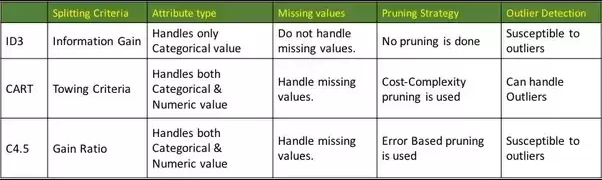


The problem with the decision tree alone is that they overfit the data. Decision tree are binary tree's so there is a left node or right node. Random forest is ensembler of decision tree's so by that mean multiple decision tree join to gether to create a decision tree.

The example below is a basic implementation of random forest algorithm. We have implemented ID3 information gain with entropy calculation to make a decision tree. Multiple tree's ensemble to make a forest.

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pprint import pprint
import scipy.stats as sps
from sklearn.tree import export_graphviz # Import tools needed for visualization
# import pydot
from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))
#This module implements pseudo-random number generators for various distributions.
#seeding the generated number makes our results reproducible (good for debugging)
from random import seed
#Return a randomly selected element from range(start, stop, step). 
from random import randrange
#read CSV file (dataset)
from csv import reader
#square root function
from math import sqrt
import csv

In [ ]:
dataset = pd.read_csv('../input/mushroom-classification/mushrooms.csv')
dataset = dataset.sample(frac=1)
dataset.columns = ['target','cap-shape','cap-surface','cap-color','bruises','odor','gill-attachment','gill-spacing',
             'gill-size','gill-color','stalk-shape','stalk-root','stalk-surface-above-ring','stalk-surface-below-ring','stalk-color-above-ring',
             'stalk-color-below-ring','veil-type','veil-color','ring-number','ring-type','spore-print-color','population',
             'habitat']

In [ ]:
# Entropy
def entropy(target_col):
    elements,counts = np.unique(target_col,return_counts = True)
    entropy = np.sum([(-counts[i]/np.sum(counts))*np.log2(counts[i]/np.sum(counts)) for i in range(len(elements))])
    return entropy

# Info Gain
def InfoGain(data,split_attribute_name,target_name="target"):
    
    #Calculate the entropy of the total dataset
    total_entropy = entropy(data[target_name])
#     print('Total Entropy :',total_entropy)
    ##Calculate the entropy of the dataset
    
    #Calculate the values and the corresponding counts for the split attribute 
    vals,counts= np.unique(data[split_attribute_name],return_counts=True)
    
    #Calculate the weighted entropy
    Weighted_Entropy = np.sum([(counts[i]/np.sum(counts))*entropy(data.where(data[split_attribute_name]==vals[i]).dropna()[target_name]) for i in range(len(vals))])
#     print('Weighted Entropy :',Weighted_Entropy)
    #Calculate the information gain
    Information_Gain = total_entropy - Weighted_Entropy
#     print('Information Gain :',Information_Gain)
    return Information_Gain
       

# ID3
def ID3(data,originaldata,features,target_attribute_name="target",parent_node_class = None):
    #Define the stopping criteria --> If one of this is satisfied, we want to return a leaf node#
    
    #If all target_values have the same value, return this value
    if len(np.unique(data[target_attribute_name])) <= 1:
        return np.unique(data[target_attribute_name])[0]
    
    #If the dataset is empty, return the mode target feature value in the original dataset
    elif len(data)==0:
        return np.unique(originaldata[target_attribute_name])[np.argmax(np.unique(originaldata[target_attribute_name],return_counts=True)[1])]
    
    #If the feature space is empty, return the mode target feature value of the direct parent node --> Note that
    #the direct parent node is that node which has called the current run of the ID3 algorithm and hence
    #the mode target feature value is stored in the parent_node_class variable.
    
    elif len(features) ==0:
        return parent_node_class
    
    #If none of the above holds true, grow the tree!
    
    else:
        #Set the default value for this node --> The mode target feature value of the current node
        parent_node_class = np.unique(data[target_attribute_name])[np.argmax(np.unique(data[target_attribute_name],return_counts=True)[1])]
        
        ################################################################################################################
        ############!!!!!!!!!Implement the subspace sampling. Draw a number of m = sqrt(p) features!!!!!!!!#############
        ###############################################################################################################
        
        
        features = np.random.choice(features,size=np.int(np.sqrt(len(features))),replace=False)
        
        #Select the feature which best splits the dataset
        item_values = [InfoGain(data,feature,target_attribute_name) for feature in features] #Return the information gain values for the features in the dataset
        best_feature_index = np.argmax(item_values)
        best_feature = features[best_feature_index]
        
        #Create the tree structure. The root gets the name of the feature (best_feature) with the maximum information
        #gain in the first run
        tree = {best_feature:{}}
        
        #Remove the feature with the best inforamtion gain from the feature space
        features = [i for i in features if i != best_feature]
        
        
        #Grow a branch under the root node for each possible value of the root node feature
        
        for value in np.unique(data[best_feature]):
            value = value
            #Split the dataset along the value of the feature with the largest information gain and therwith create sub_datasets
            sub_data = data.where(data[best_feature] == value).dropna()
            
            #Call the ID3 algorithm for each of those sub_datasets with the new parameters --> Here the recursion comes in!
            subtree = ID3(sub_data,dataset,features,target_attribute_name,parent_node_class)
            
            #Add the sub tree, grown from the sub_dataset to the tree under the root node
            tree[best_feature][value] = subtree
            
        return(tree)    
    
                
###########################################################################################################
###########################################################################################################
    
def predict(query,tree,default = 'p'):
        
    for key in list(query.keys()):
        if key in list(tree.keys()):
            try:
                result = tree[key][query[key]] 
            except:
                return default
            result = tree[key][query[key]]
            if isinstance(result,dict):
                return predict(query,result)
            else:
                return result
        
        
###########################################################################################################
###########################################################################################################
def train_test_split(dataset):
    training_data = dataset.iloc[:round(0.75*len(dataset))].reset_index(drop=True)#We drop the index respectively relabel the index
    #starting form 0, because we do not want to run into errors regarding the row labels / indexes
    testing_data = dataset.iloc[round(0.75*len(dataset)):].reset_index(drop=True)
    return training_data,testing_data
training_data = train_test_split(dataset)[0]
testing_data = train_test_split(dataset)[1] 
###########################################################################################################
###########################################################################################################
#######Train the Random Forest model###########
def RandomForest_Train(dataset,number_of_Trees):
    #Create a list in which the single forests are stored
    random_forest_sub_tree = []
    
    #Create a number of n models
    for i in range(number_of_Trees):
        #Create a number of bootstrap sampled datasets from the original dataset 
        bootstrap_sample = dataset.sample(frac=1,replace=True)
        
        #Create a training and a testing datset by calling the train_test_split function
        bootstrap_training_data = train_test_split(bootstrap_sample)[0]
        bootstrap_testing_data = train_test_split(bootstrap_sample)[1] 
        
        
        #Grow a tree model for each of the training data
        #We implement the subspace sampling in the ID3 algorithm itself. Hence take a look at the ID3 algorithm above!
        random_forest_sub_tree.append(ID3(bootstrap_training_data,bootstrap_training_data,bootstrap_training_data.drop(labels=['target'],axis=1).columns))
        
    return random_forest_sub_tree
        
random_forest = RandomForest_Train(dataset,50)
 
#######Predict a new query instance###########
def RandomForest_Predict(query,random_forest,default='p'):
    predictions = []
    for tree in random_forest:
        predictions.append(predict(query,tree,default))
    return sps.mode(predictions)[0][0]
query = testing_data.iloc[0,:].drop('target').to_dict()
query_target = testing_data.iloc[0,0]
prediction = RandomForest_Predict(query,random_forest)

#######Test the model on the testing data and return the accuracy###########
def RandomForest_Test(data,random_forest):
    data['predictions'] = None
    for i in range(len(data)):
        query = data.iloc[i,:].drop('target').to_dict()
        data.loc[i,'predictions'] = RandomForest_Predict(query,random_forest,default='p')
    accuracy = sum(data['predictions'] == data['target'])/len(data)*100
    print('The prediction accuracy is: ',sum(data['predictions'] == data['target'])/len(data)*100,'%')
    return accuracy
        
        
        
RandomForest_Test(testing_data,random_forest)

In [ ]:
##############################################################################################################
##########Plot the prediction accuracy with respect to the number of Trees in the random forests#############
##############################################################################################################
# accuracy = []
# # Where i is the number of tress
# for i in range(1,7,1):
#     random_forest = RandomForest_Train(dataset,i)
#     accuracy.append(RandomForest_Test(testing_data,random_forest))
accuracy = []
for i in range(1,11,1):
    random_forest = RandomForest_Train(dataset,i)
    accuracy.append(RandomForest_Test(testing_data,random_forest))
for i in range(10,110,10):
    random_forest = RandomForest_Train(dataset,i)
    accuracy.append(RandomForest_Test(testing_data,random_forest))
# for i in range(100,1100,100):
#     random_forest = RandomForest_Train(dataset,i)
#     accuracy.append(RandomForest_Test(testing_data,random_forest))
print(accuracy)


In [ ]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
fig = plt.figure(figsize=(15,10))
ax0 = fig.add_subplot(111)
ax0.plot(np.logspace(0,2,20),accuracy)
ax0.set_yticks(np.linspace(50,100,50))
ax0.set_title("Accuracy with respect to the numer of trees in the ID3 random forest")
ax0.set_xscale('log')
ax0.set_xlabel("Number of Trees")
ax0.set_ylabel('Accuracy(%)')
plt.show()

**CART**

Classification and Regression tree for short CART was introduced by Leo for decision tree algorithms family. 
Implementation of CART random forest using gini index and hyper parameter optimization


In [ ]:
# Random Forest Algorithm
#This module implements pseudo-random number generators for various distributions.
#seeding the generated number makes our results reproducible (good for debugging)
from random import seed
#Return a randomly selected element from range(start, stop, step). 
from random import randrange
#read CSV file (dataset)
from csv import reader
#square root function
from math import sqrt

**Support Function**

In [ ]:
# Load a CSV file
def load_csv(filename):
    #init the dataset as a list
    dataset = list()
    #open it as a readable file
    with open(filename, 'r') as file:
        #init the csv reader
        csv_reader = reader(file)
        #for every row in the dataset
        for row in csv_reader:
            if not row:
                continue
            #add that row as an element in our dataset list (2D Matrix of values)
            dataset.append(row)
    #return in-memory data matrix
#     dataset=csv_file
    return dataset

In [ ]:
# Split a dataset into k folds
# the original sample is randomly partitioned into k equal sized subsamples. 
#Of the k subsamples, a single subsample is retained as the validation data 
#for testing the model, and the remaining k − 1 subsamples are used as training data. 
#The cross-validation process is then repeated k times (the folds),
#with each of the k subsamples used exactly once as the validation data.
def cross_validation_split(dataset, n_folds):
    dataset_split = list()
    dataset_copy = list(dataset)
    fold_size = int(len(dataset) / n_folds)
    for i in range(n_folds):
        fold = list()
        while len(fold) < fold_size:
            index = randrange(len(dataset_copy))
            fold.append(dataset_copy.pop(index))
        dataset_split.append(fold)
    return dataset_split


In [ ]:
# Split a dataset based on an attribute and an attribute value
def test_split(index, value, dataset):
    #init 2 empty lists for storing split dataubsets
    left, right = list(), list()
    #for every row
    for row in dataset:
        #if the value at that row is less than the given value
        if row[index] < value:
            #add it to list 1
            left.append(row)
        else:
            #else add it list 2 
            right.append(row)
    #return both lists
    return left, right

In [ ]:
# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
    #how many correct predictions?
    correct = 0
    #for each actual label
    for i in range(len(actual)):
        #if actual matches predicted label
        if actual[i] == predicted[i]:
            #add 1 to the correct iterator
            correct += 1
    #return percentage of predictions that were correct
    return correct / float(len(actual)) * 100.0

In [ ]:
# Evaluate an algorithm using a cross validation split
def evaluate_algorithm(dataset, algorithm, n_folds, *args):
    #folds are the subsamples used to train and validate model
    folds = cross_validation_split(dataset, n_folds)
    scores = list()
    #for each subsample
    for fold in folds:
        #create a copy of the data
        train_set = list(folds)
        #remove the given subsample
        train_set.remove(fold)
        train_set = sum(train_set, [])
        #init a test set
        test_set = list()
        #add each row in a given subsample to the test set
        for row in fold:
            row_copy = list(row)
            test_set.append(row_copy)
            row_copy[-1] = None
        #get predicted labls
        predicted = algorithm(train_set, test_set, *args)
        #get actual labels
        actual = [row[-1] for row in fold]
        #compare accuracy
        accuracy = accuracy_metric(actual, predicted)
        #add it to scores list, for each fold
        scores.append(accuracy)
    #return all accuracy scores
    return scores

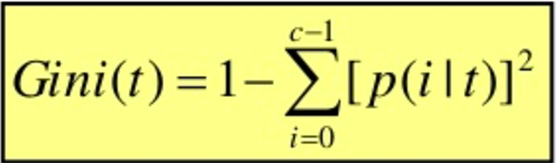


In [ ]:
# Calculate the Gini index for a split dataset
## this is the name of the cost function used to evaluate splits in the dataset.
# this is a measure of how often a randomly chosen element from the set 
#would be incorrectly labeled if it was randomly labeled according to the distribution
#of labels in the subset. Can be computed by summing the probability
#of an item with label i being chosen times the probability 
#of a mistake in categorizing that item. 
#It reaches its minimum (zero) when all cases in the node 
#fall into a single target category.
#A split in the dataset involves one input attribute and one value for that attribute. 
#It can be used to divide training patterns into two groups of rows.
#A Gini score gives an idea of how good a split is by how mixed the classes 
#are in the two groups created by the split. A perfect separation results in 
#a Gini score of 0, whereas the worst case split that results in 50/50 classes 
#in each group results in a Gini score of 1.0 (for a 2 class problem).
#We first need to calculate the proportion of classes in each group.

def gini_index(groups, class_values):
    gini = 0.0
    #for each class
    for class_value in class_values:
        #a random subset of that class
        for group in groups:
            size = len(group)
            if size == 0:
                continue
            #average of all class values
            proportion = [row[-1] for row in group].count(class_value) / float(size)
            #  sum all (p * 1-p) values, this is gini index
            gini += (proportion * (1.0 - proportion))
    return gini

In [ ]:
# Select the best split point for a dataset
#This is an exhaustive and greedy algorithm
def get_split(dataset, n_features):
    ##Given a dataset, we must check every value on each attribute as a candidate split, 
    #evaluate the cost of the split and find the best possible split we could make.
    class_values = list(set(row[-1] for row in dataset))
    b_index, b_value, b_score, b_groups = 999, 999, 999, None
    features = list()
    while len(features) < n_features:
        index = randrange(len(dataset[0])-1)
        if index not in features:
            features.append(index)
    for index in features:
        for row in dataset:
            ##When selecting the best split and using it as a new node for the tree 
            #we will store the index of the chosen attribute, the value of that attribute 
            #by which to split and the two groups of data split by the chosen split point.
            ##Each group of data is its own small dataset of just those rows assigned to the 
            #left or right group by the splitting process. You can imagine how we might split 
            #each group again, recursively as we build out our decision tree.
            groups = test_split(index, row[index], dataset)
            gini = gini_index(groups, class_values)
            if gini < b_score:
                b_index, b_value, b_score, b_groups = index, row[index], gini, groups
    ##Once the best split is found, we can use it as a node in our decision tree.
    ##We will use a dictionary to represent a node in the decision tree as 
    #we can store data by name. 
    return {'index':b_index, 'value':b_value, 'groups':b_groups}

In [ ]:
# Create a terminal node value

def to_terminal(group):
    #select a class value for a group of rows. 
    outcomes = [row[-1] for row in group]
    #returns the most common output value in a list of rows.
    return max(set(outcomes), key=outcomes.count)


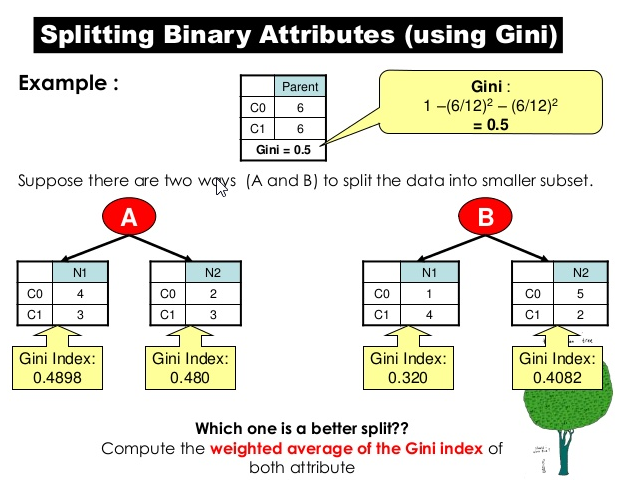


In [ ]:
#Create child splits for a node or make terminal
#Building a decision tree involves calling the above developed get_split() function over 
#and over again on the groups created for each node.
#New nodes added to an existing node are called child nodes. 
#A node may have zero children (a terminal node), one child (one side makes a prediction directly) 
#or two child nodes. We will refer to the child nodes as left and right in the dictionary representation 
#of a given node.
#Once a node is created, we can create child nodes recursively on each group of data from 
#the split by calling the same function again.

def split(node, max_depth, min_size, n_features, depth):
    #Firstly, the two groups of data split by the node are extracted for use and 
    #deleted from the node. As we work on these groups the node no longer requires access to these data.
    left, right = node['groups']
    del(node['groups'])
    
    #Next, we check if either left or right group of rows is empty and if so we create 
    #a terminal node using what records we do have.
    # check for a no split
    if not left or not right:
        node['left'] = node['right'] = to_terminal(left + right)
        return
    #We then check if we have reached our maximum depth and if so we create a terminal node.
    # check for max depth
    if depth >= max_depth:
        node['left'], node['right'] = to_terminal(left), to_terminal(right)
        return
    #We then process the left child, creating a terminal node if the group of rows is too small, 
    #otherwise creating and adding the left node in a depth first fashion until the bottom of 
    #the tree is reached on this branch.
    # process left child
    if len(left) <= min_size:
        node['left'] = to_terminal(left)
    else:
        node['left'] = get_split(left, n_features)
        split(node['left'], max_depth, min_size, n_features, depth+1)
    # process right child
    #The right side is then processed in the same manner, 
    #as we rise back up the constructed tree to the root.
    if len(right) <= min_size:
        node['right'] = to_terminal(right)
    else:
        node['right'] = get_split(right, n_features)
        split(node['right'], max_depth, min_size, n_features, depth+1)

In [ ]:
#Build a decision tree

def build_tree(train, max_depth, min_size, n_features):
    #Building the tree involves creating the root node and 
    root = get_split(train, n_features)
    #calling the split() function that then calls itself recursively to build out the whole tree.
    split(root, max_depth, min_size, n_features, 1)
    return root

In [ ]:
# Making predictions with a decision tree involves navigating the 
# tree with the specifically provided row of data.
# Again, we can implement this using a recursive function, where the same prediction routine is 
# called again with the left or the right child nodes, depending on how the split affects the provided data.
# We must check if a child node is either a terminal value to be returned as the prediction
# or if it is a dictionary node containing another level of the tree to be considered.
def predict(node, row):
    if row[node['index']] < node['value']:
        if isinstance(node['left'], dict):
            return predict(node['left'], row)
        else:
            return node['left']
    else:
        if isinstance(node['right'], dict):
            return predict(node['right'], row)
        else:
            return node['right']

In [ ]:
# Create a random subsample from the dataset with replacement
def subsample(dataset, ratio):
    sample = list()
    n_sample = round(len(dataset) * ratio)
    while len(sample) < n_sample:
        index = randrange(len(dataset))
        sample.append(dataset[index])
    return sample

In [ ]:
# Make a prediction with a list of bagged trees

# Responsible for making a prediction with each decision tree and 
# combining the predictions into a single return value. 
# This is achieved by selecting the most common prediction 
# from the list of predictions made by the bagged trees.

def bagging_predict(trees, row):
    predictions = [predict(tree, row) for tree in trees]
    return max(set(predictions), key=predictions.count)

# Random Forest Algorithm

# Responsible for creating the samples of the training dataset, 
# training a decision tree on each, then making predictions on 
# the test dataset using the list of bagged trees.
 

def random_forest(train, test, max_depth, min_size, sample_size, n_trees, n_features):
    trees = list()
    for i in range(n_trees):
        sample = subsample(train, sample_size)
        tree = build_tree(sample, max_depth, min_size, n_features)
        trees.append(tree)
    predictions = [bagging_predict(trees, row) for row in test]
    return(predictions)

# Test the random forest algorithm

seed(1)

# load and prepare data

filename = '../input/mines-vs-rocks/sonar.all-data.csv'
dataset = load_csv(filename)

# Hyper parameters

n_folds = 5
max_depth = 10
min_size = 1
sample_size = 1.0

# Evaluate algorithm

n_features = int(sqrt(len(dataset[0])-1))
for n_trees in [1, 5, 10]:
    scores = evaluate_algorithm(dataset, random_forest, n_folds, max_depth, min_size, sample_size, n_trees, n_features)
    print('Trees: %d' % n_trees)
    print('Scores: %s' % scores)
    print('Mean Accuracy: %.3f%%' % (sum(scores)/float(len(scores))))

**Fine Tuning Hyper Parameters (number of folds/maximum tree depth) by trial and error method**

In [ ]:
seed(1)
filename = '../input/mines-vs-rocks/sonar.all-data.csv'
dataset = load_csv(filename)
n_folds = 3
max_depth = 100
min_size = 1
sample_size = 1.0
n_features = int(sqrt(len(dataset[0])-1))
for n_trees in [1, 5, 10]:
	scores = evaluate_algorithm(dataset, random_forest, n_folds, max_depth, min_size, sample_size, n_trees, n_features)
	print('Trees: %d' % n_trees)
	print('Scores: %s' % scores)
	print('Mean Accuracy: %.3f%%' % (sum(scores)/float(len(scores))))